<a href="https://colab.research.google.com/github/rajasreekalli/sales_predicions/blob/main/Sales_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [181]:
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [182]:
types = df.dtypes
print(types)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [183]:
print(df.drop_duplicates())

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [184]:
item_missing = df.isna()
print(item_missing.sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [185]:
address_missing=df.loc[0:8522,:].fillna(method='ffill')
print(address_missing)

     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [186]:
final_missing = address_missing.isna()
print(final_missing.sum())
print(address_missing)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834

In [187]:
ohe_df = pd.get_dummies(address_missing, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
ohe_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,2778.3834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,549.2850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,1193.1136,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,1845.5976,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [188]:
feature_names = {'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'}
df.loc[:, feature_names]

,Item_Visibility,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Item_MRP,Outlet_Type,Item_Weight,Item_Identifier,Item_Fat_Content,Outlet_Size,Item_Type
0,0.016047,1999,OUT049,Tier 1,249.8092,Supermarket Type1,9.300,FDA15,Low Fat,Medium,Dairy
1,0.019278,2009,OUT018,Tier 3,48.2692,Supermarket Type2,5.920,DRC01,Regular,Medium,Soft Drinks
2,0.016760,1999,OUT049,Tier 1,141.6180,Supermarket Type1,17.500,FDN15,Low Fat,Medium,Meat
3,0.000000,1998,OUT010,Tier 3,182.0950,Grocery Store,19.200,FDX07,Regular,NaN,Fruits and Vegetables
4,0.000000,1987,OUT013,Tier 3,53.8614,Supermarket Type1,8.930,NCD19,Low Fat,High,Household
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,1987,OUT013,Tier 3,214.5218,Supermarket Type1,6.865,FDF22,Low Fat,High,Snack Foods
8519,0.046982,2002,OUT045,Tier 2,108.1570,Supermarket Type1,8.380,FDS36,Regular,NaN,Baking Goods
8520,0.035186,2004,OUT035,Tier 2,85.1224,Supermarket Type1,10.600,NCJ29,Low Fat,Small,Health and Hygiene
8521,0.145221,2009,OUT018,Tier 3,103.1332,Supermarket Type2,7.210,FDN46,Regular,Medium,Snack Foods


In [189]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#We only want to encode the categorical columns.  
#We can use .select_dtypes() to get the columns we want
cat_train = X_train.select_dtypes(include='object')
cat_test = X_test.select_dtypes(include='object')

#fit
ohe.fit(cat_train)

#transform
cat_train_ohe = ohe.transform(cat_train)
cat_test_ohe = ohe.transform(cat_test)


In [190]:
# Build and evaluate a simple decision tree model.
X = df.loc[:, feature_names].values
X.shape

(8523, 11)

In [191]:
y = df.loc[:, 'Item_Outlet_Sales'].values
y.shape

(8523,)

In [192]:
y = ohe_df['Item_Outlet_Sales']
X = ohe_df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

In [193]:
print(X.shape)
print(y.shape)

(8523, 30)
(8523,)


In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [195]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [196]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [197]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [198]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.19614377840954367


In [199]:
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [200]:
dec_tree.get_depth()

36

In [201]:
dec_tree.get_n_leaves()

6231

In [202]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.23779715896629305
0.2296825886952033


In [203]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.8556774630607085
0.3661296614748639


In [204]:
max_depth_range = list(range(2, 36))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

In [205]:
dec_tree_9 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.23779715896629305
0.2296825886952033


In [206]:
dt = DecisionTreeRegressor(max_depth=1)

dt.fit(X_train, y_train)

print('Training Scores')
evaluate_model(y_train, dt.predict(X_train))

print('\n')

print('Testing Scores')
evaluate_model(y_test, dt.predict(X_test))

Training Scores
scores: MAE: 1138.532860052247, 
MSE: 2255705.5459035537, 
RMSE: 1501.900644484699,   
R2: 0.23779715896629305


Testing Scores
scores: MAE: 1112.1493929010464, 
MSE: 2125288.2421919513, 
RMSE: 1457.83683661511,   
R2: 0.2296825886952033


In [207]:
# Build and evaluate a bagged tree model.
from sklearn.ensemble import BaggingRegressor

In [208]:
bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [209]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [210]:
bagreg.predict(X_test)

array([ 708.34462, 1101.16662,  749.82396, ..., 4484.96196, 1755.51486,
       2746.7579 ])

In [211]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9177708496942939
0.519151194950634


In [212]:
from sklearn.metrics import mean_squared_error
bagreg = BaggingRegressor(random_state = 42)
bagreg.fit(X_train, y_train)
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

Training RMSE: 493.3087551935338
Testing RMSE: 1151.803339116609


In [213]:
# Build and evaluate a random forest model.  
from sklearn.ensemble import RandomForestRegressor


In [214]:
rf = RandomForestRegressor(random_state = 42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [215]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [216]:
rf.predict(X_test)

array([ 881.359408,  915.002282,  750.6895  , ..., 4058.137554,
       1937.870822, 2156.938996])

In [217]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.936677243546331
0.5457110738856209


In [218]:
rf_2 = RandomForestRegressor(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
rf_2_train_score = rf_2.score(X_train, y_train)
rf_2_test_score = rf_2.score(X_test, y_test)
print(rf_2_train_score)
print(rf_2_test_score)

0.3752256358688273
0.36382831062522003


In [219]:
[estimator.get_depth() for estimator in rf.estimators_]

[33,
 29,
 32,
 32,
 35,
 35,
 29,
 39,
 37,
 32,
 35,
 29,
 33,
 31,
 35,
 33,
 32,
 34,
 30,
 31,
 33,
 31,
 34,
 30,
 35,
 33,
 36,
 35,
 33,
 34,
 34,
 34,
 34,
 30,
 35,
 32,
 32,
 36,
 34,
 30,
 34,
 33,
 33,
 35,
 33,
 34,
 36,
 38,
 36,
 31,
 33,
 39,
 31,
 32,
 32,
 32,
 34,
 37,
 30,
 32,
 35,
 36,
 31,
 31,
 32,
 36,
 38,
 32,
 35,
 32,
 37,
 32,
 37,
 37,
 33,
 31,
 34,
 37,
 40,
 37,
 30,
 31,
 33,
 41,
 32,
 33,
 38,
 37,
 34,
 31,
 32,
 32,
 32,
 37,
 36,
 31,
 32,
 40,
 36,
 37]

In [220]:
rf_300 = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf_300.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [221]:
rf_300_train_score = rf_300.score(X_train, y_train)
rf_300_test_score = rf_300.score(X_test, y_test)
print(rf_300_train_score)
print(rf_300_test_score)

0.9389027222654243
0.5496042739200401


In [222]:
from sklearn.metrics import mean_squared_error
rf_2 = RandomForestRegressor(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Training RMSE: 432.8982476438968
Testing RMSE: 1119.5413477186305


In [223]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [224]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

In [226]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.5607558266151483


In [227]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.5653622953524624


In [228]:
from sklearn.metrics import mean_squared_error
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

Training RMSE: 1140.1419537074548
Testing RMSE: 1095.059612782324


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [235]:
# Balence
train_rmse_scores = []
test_rmse_scores = []
depths = range(1, 42)

for depth in depths:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train, y_train)

  train_pred = dt.predict(X_train)
  test_pred = dt.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) 
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_scores.append(train_rmse)
  test_rmse_scores.append(test_rmse)


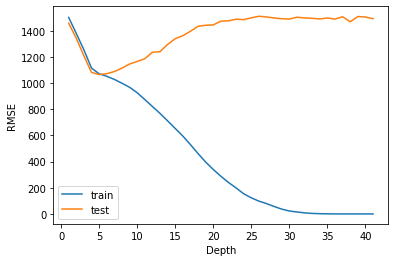

In [236]:
plt.plot(depths, train_rmse_scores, label='train')
plt.plot(depths, test_rmse_scores, label='test')
plt.ylabel('RMSE')
plt.xlabel('Depth')
plt.legend()
plt.show()

r2 values of all models are different. Because we are having the different testing and traing data. 

In [232]:
# Compare the performance of your models based on rmse.  
# ans:All rmse values are different. Because we are using different libraries.

In [233]:
# Overall, which model do you recommend?
# ans: I recommended the Random Forests because the result is better than Regression. So i feel it is easy to interpret.